In [141]:
from nilearn import datasets

dataset = datasets.fetch_atlas_harvard_oxford("cort-maxprob-thr25-2mm")
atlas_filename = dataset.maps
labels = dataset.labels
print(labels)

['Background', 'Frontal Pole', 'Insular Cortex', 'Superior Frontal Gyrus', 'Middle Frontal Gyrus', 'Inferior Frontal Gyrus, pars triangularis', 'Inferior Frontal Gyrus, pars opercularis', 'Precentral Gyrus', 'Temporal Pole', 'Superior Temporal Gyrus, anterior division', 'Superior Temporal Gyrus, posterior division', 'Middle Temporal Gyrus, anterior division', 'Middle Temporal Gyrus, posterior division', 'Middle Temporal Gyrus, temporooccipital part', 'Inferior Temporal Gyrus, anterior division', 'Inferior Temporal Gyrus, posterior division', 'Inferior Temporal Gyrus, temporooccipital part', 'Postcentral Gyrus', 'Superior Parietal Lobule', 'Supramarginal Gyrus, anterior division', 'Supramarginal Gyrus, posterior division', 'Angular Gyrus', 'Lateral Occipital Cortex, superior division', 'Lateral Occipital Cortex, inferior division', 'Intracalcarine Cortex', 'Frontal Medial Cortex', 'Juxtapositional Lobule Cortex (formerly Supplementary Motor Cortex)', 'Subcallosal Cortex', 'Paracingulate

In [44]:
file_name="/Users/ojun-yong/Desktop/bids_ex/fmriprep/sub-01/ses-1/func/sub-01_ses-1_task-BRAINMRINONCONTRASTDIFFUSION_acq-AxialfMRIrest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz"

In [47]:
import pandas as pd
confounds = pd.read_csv("/Users/ojun-yong/Desktop/bids_ex/fmriprep/sub-01/ses-1/func/sub-01_ses-1_task-BRAINMRINONCONTRASTDIFFUSION_acq-AxialfMRIrest_desc-confounds_timeseries.tsv",sep='\t')

In [94]:
import numpy as np
confounds = confounds.fillna(0)

In [95]:
from nilearn.maskers import NiftiLabelsMasker

masker = NiftiLabelsMasker(
    labels_img=atlas_filename,
    standardize="zscore_sample",
    standardize_confounds="zscore_sample",
    memory="nilearn_cache",
    verbose=5,
)

# Here we go from nifti files to the signal time series in a numpy
# array. Note how we give confounds to be regressed out during signal
# extraction
time_series = masker.fit_transform(file_name, confounds=confounds)

[NiftiLabelsMasker.wrapped] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[   2.,    0.,    0.,  -90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
Resampling labels
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract('/Users/ojun-yong/Desktop/bids_ex/fmriprep/sub-01/ses-1/func/sub-01_ses-1_task-BRAINMRINONCONTRASTDIFFUSION_acq-AxialfMRIrest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'clean_kwargs': {},
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'keep_masked_labels': True,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7f83b8d57520>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': 'zscore_sample',
  'standardize_c

In [130]:
from nilearn.connectome import ConnectivityMeasure

pd.DataFrame(time_series)

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,2.316748,4.285933,3.188085,3.145129,4.256164,4.241040,3.510809,3.517583,3.394140,4.099470,...,3.784923,3.823652,4.595059,3.840317,3.752371,3.555363,3.274441,3.885000,2.969569,3.250767
1,2.227907,2.765421,3.237403,3.235922,3.221431,3.401716,3.055198,1.761979,2.290096,2.881324,...,2.933691,3.700317,3.011687,2.466482,2.695015,1.689306,1.782873,3.024662,2.333486,3.658375
2,1.005445,2.295447,2.124721,2.422630,2.378175,2.415991,2.275602,1.026346,2.288514,1.808940,...,1.832729,2.501926,1.399298,1.910409,1.875056,0.828657,0.707184,1.401797,1.896259,2.675076
3,0.034400,1.917657,1.459746,1.936082,2.383007,2.033965,1.723207,0.189570,1.730414,1.459122,...,1.558933,1.612717,0.731240,1.138122,1.504515,0.605201,0.822841,1.239217,1.073474,1.358081
4,-0.589410,1.517216,1.000824,1.184861,1.724535,1.428679,1.158307,-0.090356,1.591859,1.131956,...,1.567212,1.275868,0.977964,0.995990,1.492847,1.030530,1.007722,0.952251,1.018992,1.283649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.727030,-0.535985,-1.469263,-1.100633,-1.147294,-1.335038,-0.905617,0.264788,-1.198090,-1.168124,...,-0.942303,-0.536363,-1.005705,-0.487644,-0.867245,-0.938749,-0.459818,-0.832148,-0.191465,-0.956745
96,0.423356,-0.753617,-1.621660,-1.360544,-0.799919,-1.125309,-0.888370,0.146170,-1.191680,-1.115819,...,-0.994462,-0.630811,-1.073967,-0.577548,-0.585738,-0.621840,-0.906096,-1.165593,-0.832084,-0.911165
97,0.483460,-0.396516,-1.493271,-1.151618,-0.463720,-0.649117,-1.069566,1.206467,-0.893539,-0.916257,...,-0.370588,-0.295295,-0.604481,-0.716828,-0.573560,0.095261,-0.641298,-0.949546,-0.940144,-0.748906
98,0.696351,-0.557150,-1.342692,-1.107017,-1.055004,-1.289804,-1.220497,1.125910,-1.267976,-1.224552,...,-0.790210,-0.709650,-0.716280,-0.894386,-0.904849,-0.173047,-0.996042,-1.013759,-0.814369,-0.833145


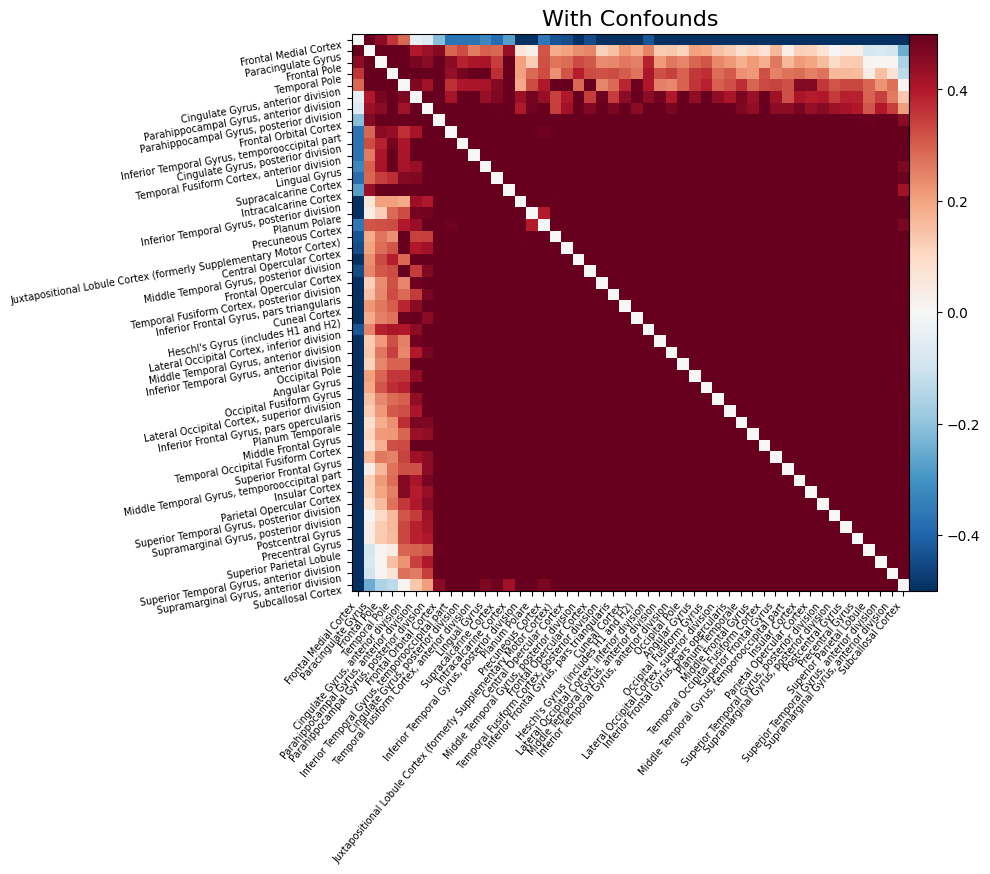

In [140]:
correlation_measure = ConnectivityMeasure(
    kind="correlation",
    standardize="zscore_sample")

correlation_matrix = correlation_measure.fit_transform([time_series])[0]

from nilearn import plotting

np.fill_diagonal(correlation_matrix,0)
plotting.plot_matrix(
    correlation_matrix,
    figure=(10, 10),
    labels=labels[1:],
    vmax=0.5,
    vmin=-0.5,
    title="With Confounds",
    reorder=True,
)


    